<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/image_processing_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS

In [42]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Download image from web

In [ ]:
!wget "https://i0.wp.com/clownfishtv.com/wp-content/uploads/2022/11/Andrew-Garfield-Spider-Man.jpg?fit=1200%252C740&ssl=1" -O /content/person.jpg

# BASIC IMAGE PREPROCEESING

## READING AN IMAGE

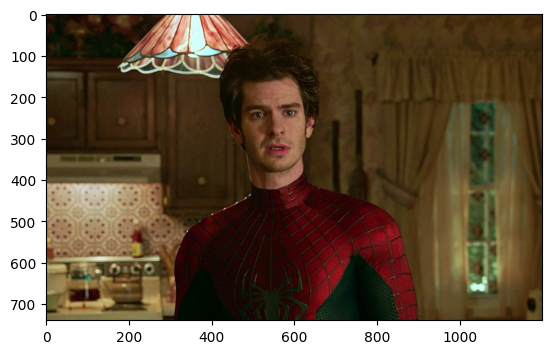

In [6]:
image = cv.imread('/content/person.jpg')

prev = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(prev)

## Resize the image

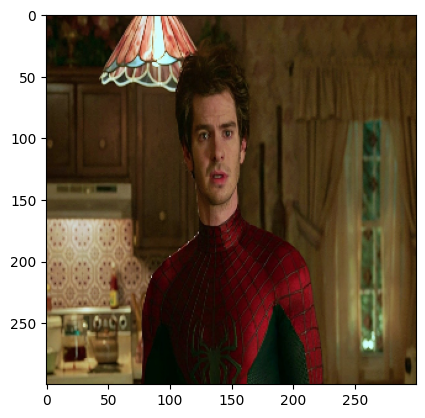

In [11]:
image_resize = cv.resize(image, (300,300))

plt.imshow(cv.cvtColor(image_resize, cv.COLOR_BGR2RGB))

## Colour filters

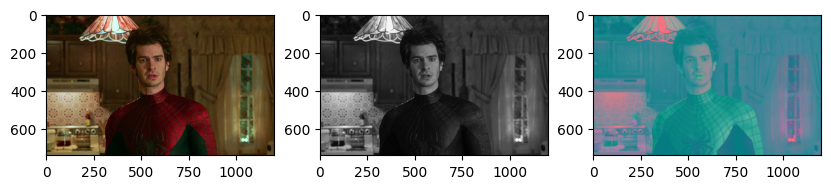

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2LAB))

## Edge filters

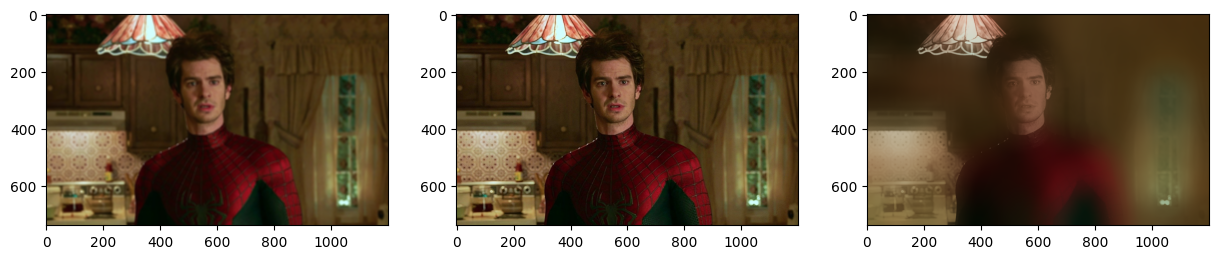

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,2)
plt.imshow(prev)
plt.subplot(1,3,1)
plt.imshow(cv.blur(prev, (8,8)))
plt.subplot(1,3,3)
plt.imshow(cv.bilateralFilter(prev, 150, 175, 175))

## Thresholding

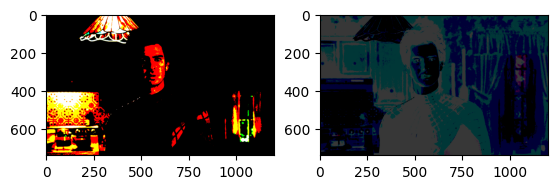

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
_, th1 = cv.threshold(prev, 127, 255, cv.THRESH_BINARY)
plt.imshow(th1)
plt.subplot(1,3,2)
_, th2 = cv.threshold(prev, 50, 55, cv.THRESH_BINARY_INV)
plt.imshow(th2)

# COUNTER ANALYSIS AND BLOB DETECTION

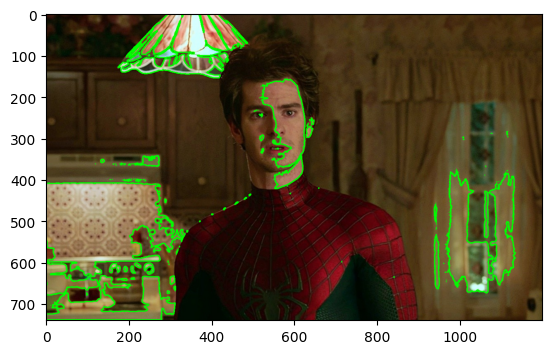

In [47]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)

contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contour_img = image.copy()

plt.imshow(cv.cvtColor(cv.drawContours(contour_img, contours, -1, (0, 255, 0), 2), cv.COLOR_BGR2RGB))

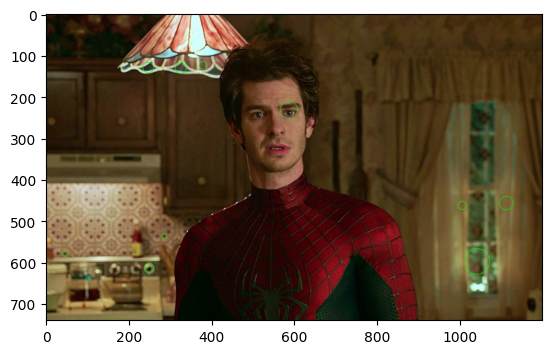

In [55]:
params = cv.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(thresh)
blob_img = cv.drawKeypoints(image, keypoints, np.array([]),
                             (0, 255, 0),cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv.cvtColor(blob_img, cv.COLOR_BGR2RGB))